## CEE 501 HW3 – ML Classifiers
#### Mohamad Al-kahlout - ASUID: 1208744156

In [158]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
#specify project folder
%cd '/content/drive/MyDrive/CEE_501/HW_3'

/content/drive/MyDrive/CEE_501/HW_3


In [160]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [161]:
#read data
data = 'Concrete_Quality_Binary.xlsx'

In [162]:
#import data into dataframe
df = pd.read_excel(data)
print(df.shape)
df.head()

(639, 10)


,Index,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),Concrete Quality
0,1,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,Good
1,2,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,Good
2,3,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,Good
3,4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,Good
4,5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,Good


In [163]:
#drop unnecesary columns
df.drop(columns='Index',inplace=True)
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),Concrete Quality
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,Good
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,Good
2,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,Good
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,Good
4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,Good


In [164]:
#summarize data to understand general data set compsition
df['Concrete Quality'].value_counts()

,count
Concrete Quality,
Bad,349
Good,290


In [165]:
#binarize the target column Bad/Good to 0/1
lb = preprocessing.LabelBinarizer()
df[df.columns[8]] = lb.fit_transform(df[df.columns[8]])
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),Concrete Quality
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,1
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,1
2,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,1
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,1
4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,1


In [166]:
#split data into X an y
X = df[df.columns[:8]]
y = df[df.columns[8]]
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),Concrete Quality
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,1
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,1
2,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,1
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,1
4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,1


In [167]:
# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [168]:
# Define the classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbor": KNeighborsClassifier(),
    "Linear SVM": LinearSVC(),
}

# Use K-fold cross validation strategy with K=5 and find the best classifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# shuffle data while doing cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# initial runs resulted in variying results, hyperparameters cleared for initial step

results = {}
print("Model Evaluation Results (Average Accuracy over 5-fold Cross-Validation):")
for name, model in models.items():
    # Use the scaled data X_scaled for cross-validation
    scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
    results[name] = scores.mean()
    print(f"{name}: Average Accuracy = {scores.mean():.4f} (Std Dev = {scores.std():.4f})")

Model Evaluation Results (Average Accuracy over 5-fold Cross-Validation):
Logistic Regression: Average Accuracy = 0.9437 (Std Dev = 0.0321)
Naive Bayes: Average Accuracy = 0.8733 (Std Dev = 0.0444)
Decision Tree: Average Accuracy = 0.9609 (Std Dev = 0.0071)
Random Forest: Average Accuracy = 0.9718 (Std Dev = 0.0117)
K-Nearest Neighbor: Average Accuracy = 0.9359 (Std Dev = 0.0193)
Linear SVM: Average Accuracy = 0.9359 (Std Dev = 0.0285)


In [169]:
# Find the best classifier
best_model_name = max(results, key=results.get)
print(f"\nBest performing model is: {best_model_name} with Average Accuracy = {results[best_model_name]:.4f}")


Best performing model is: Random Forest with Average Accuracy = 0.9718


In [170]:
#  optimize the algorithms by tuning hyperparameters

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# define parameter grids for each classifier with tuneable hyperparameters
param_grids = {
    "Logistic Regression": {'C': [0.01, 0.1, 1, 10, 100]},
    "Decision Tree": {'max_depth': [None, 5, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]},
    "K-Nearest Neighbor": {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
    "Linear SVM": {'C': [0.01, 0.1, 1, 10, 100]},
}

fitted_grid_searches = {}
print("\nPerforming GridSearchCV for each classifier with tuneable hyperparameters...")

# iterate through models and perform GridSearchCV if a parameter grid is defined
for name, model in models.items():
    if name in param_grids:
        print(f"Optimizing {name}...")
        param_grid = param_grids[name]
        # Use the base model from the 'models' dictionary for GridSearchCV
        base_model = model.copy() if hasattr(model, 'copy') else model # Handle potential issues with copying models
        grid_search = GridSearchCV(base_model, param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_scaled, y)
        fitted_grid_searches[name] = grid_search
        print(f"{name}: Best Average Accuracy = {grid_search.best_score_:.4f}")
        print(f"{name}: Best Parameters = {grid_search.best_params_}")
    else:
        print(f"No specific parameter grid defined or tuning not typically required for {name}. Skipping optimization.")


Performing GridSearchCV for each classifier with tuneable hyperparameters...
Optimizing Logistic Regression...
Logistic Regression: Best Average Accuracy = 0.9437
Logistic Regression: Best Parameters = {'C': 1}
No specific parameter grid defined or tuning not typically required for Naive Bayes. Skipping optimization.
Optimizing Decision Tree...
Decision Tree: Best Average Accuracy = 0.9624
Decision Tree: Best Parameters = {'max_depth': None, 'min_samples_split': 2}
Optimizing Random Forest...
Random Forest: Best Average Accuracy = 0.9844
Random Forest: Best Parameters = {'max_depth': None, 'n_estimators': 200}
Optimizing K-Nearest Neighbor...
K-Nearest Neighbor: Best Average Accuracy = 0.9515
K-Nearest Neighbor: Best Parameters = {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Optimizing Linear SVM...
Linear SVM: Best Average Accuracy = 0.9390
Linear SVM: Best Parameters = {'C': 0.1}


In [171]:
# Display the average accuracies of initial models and tuned models
print("Average Accuracy Scores (5-fold Cross-Validation):")

# Print initial model results
print("\nInitial Models:")
initial_model_results = {name: score for name, score in results.items() if name not in fitted_grid_searches} # Exclude models that were tuned

for name, score in initial_model_results.items():
    print(f"- {name}: {score:.4f}")

# Print tuned model results
print("\n Tuned Models (from GridSearchCV):")
for name, result in best_results_tuned.items():
     print(f"- {name}: {result['best_score']:.4f}")

# Identify and print the overall best model (considering both initial and tuned if applicable, but here focusing on tuned)
overall_best_name = max(best_results_tuned, key=lambda name: best_results_tuned[name]['best_score'])
overall_best_score = best_results_tuned[overall_best_name]['best_score']

print(f"\nOverall Best Performing Model (after tuning): {overall_best_name} with Average Accuracy = {overall_best_score:.4f}")

Average Accuracy Scores (5-fold Cross-Validation):

Initial Models:
- Naive Bayes: 0.8733

 Tuned Models (from GridSearchCV):
- Logistic Regression: 0.9437
- Decision Tree: 0.9609
- Random Forest: 0.9859
- K-Nearest Neighbor: 0.9515
- Linear SVM: 0.9390

Overall Best Performing Model (after tuning): Random Forest with Average Accuracy = 0.9859


In [172]:
# re-evaluate the overall best tuned model to display the metrics clearly

# ensure overall_best_model_name_tuned and fitted_grid_searches are defined from previous cells
if 'overall_best_model_name_tuned' in locals() and overall_best_model_name_tuned in fitted_grid_searches:
    overall_best_tuned_model_estimator = fitted_grid_searches[overall_best_model_name_tuned].best_estimator_

    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import confusion_matrix, classification_report

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Ensure kf is defined
# Ensure X_scaled and y are defined from previous cells

    y_pred_overall_best_tuned_model = cross_val_predict(overall_best_tuned_model_estimator, X_scaled, y, cv=kf)

# get the best estimator for the overall best tuned model
    print(f"Evaluation of {overall_best_model_name_tuned} (Overall Best Tuned Model):")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y, y_pred_overall_best_tuned_model))

    print("\nClassification Report:")
    print(classification_report(y, y_pred_overall_best_tuned_model))
else:
    print("Overall best tuned model not identified. Please run the previous cells.")

Evaluation of Random Forest (Overall Best Tuned Model):

Confusion Matrix:
[[344   5]
 [  3 287]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       349
           1       0.98      0.99      0.99       290

    accuracy                           0.99       639
   macro avg       0.99      0.99      0.99       639
weighted avg       0.99      0.99      0.99       639



In [177]:
# store and report best parameters and scores for all tuned models
best_results_tuned = {}
print("\nBest parameters and cross-validation scores for tuned models (from GridSearchCV):")
for name, grid_search in fitted_grid_searches.items():
    best_results_tuned[name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }
    print(f"\n{name}:")
    print(f"  Best Average Accuracy: {best_results_tuned[name]['best_score']:.4f}")
    print(f"  Best Parameters: {best_results_tuned[name]['best_params']}")


Best parameters and cross-validation scores for tuned models (from GridSearchCV):

Logistic Regression:
  Best Average Accuracy: 0.9437
  Best Parameters: {'C': 1}

Decision Tree:
  Best Average Accuracy: 0.9624
  Best Parameters: {'max_depth': None, 'min_samples_split': 2}

Random Forest:
  Best Average Accuracy: 0.9844
  Best Parameters: {'max_depth': None, 'n_estimators': 200}

K-Nearest Neighbor:
  Best Average Accuracy: 0.9515
  Best Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

Linear SVM:
  Best Average Accuracy: 0.9390
  Best Parameters: {'C': 0.1}


In [178]:
# Identify overall best model among all tuned models
overall_best_model_name_tuned = max(best_results_tuned, key=lambda name: best_results_tuned[name]['best_score'])
overall_best_model_score_tuned = best_results_tuned[overall_best_model_name_tuned]['best_score']

print(f"\nOverall Best Performing Model (after hyperparameter tuning): {overall_best_model_name_tuned}")
print(f"Best Average Accuracy: {overall_best_model_score_tuned:.4f}")


Overall Best Performing Model (after hyperparameter tuning): Random Forest
Best Average Accuracy: 0.9844


In [179]:
# evaluate the overall best tuned model

# get the best estimator for the overall best tuned model
overall_best_tuned_model_estimator = fitted_grid_searches[overall_best_model_name_tuned].best_estimator_

# use cross_val_predict to get predictions
y_pred_overall_best_tuned_model = cross_val_predict(overall_best_tuned_model_estimator, X_scaled, y, cv=kf)

# print confusion matrix and classification report
print(f"\nEvaluation of {overall_best_model_name_tuned} (Overall Best Tuned Model):")
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred_overall_best_tuned_model))

print("\nClassification Report:")
print(classification_report(y, y_pred_overall_best_tuned_model))


Evaluation of Random Forest (Overall Best Tuned Model):

Confusion Matrix:
[[341   8]
 [  5 285]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       349
           1       0.97      0.98      0.98       290

    accuracy                           0.98       639
   macro avg       0.98      0.98      0.98       639
weighted avg       0.98      0.98      0.98       639



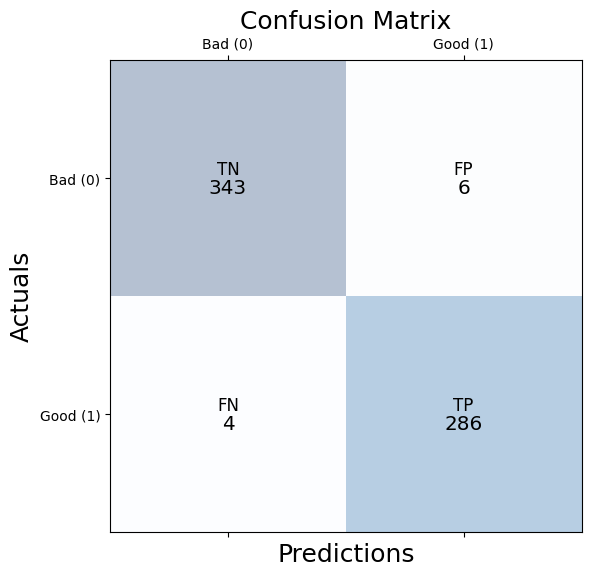

In [180]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix using actual y and cross-validated predictions y_pred_best_model
conf_matrix = confusion_matrix(y, y_pred_best_model)

fig, ax = plt.subplots(figsize=(6, 6)) # Adjusted figsize slightly for better label fit
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3) # Switched back to Blues colormap and alpha

# Add text annotations for counts and TN, FP, FN, TP labels
# The order is TN, FP, FN, TP based on standard confusion matrix layout
confusion_labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
coordinates = [(0, 0), (0, 1), (1, 0), (1, 1)] # Corresponding matrix indices

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='top', ha='center', size='x-large', color='black') # Count text - va='top' - color black


# Add TN, FP, FN, TP labels below the counts
ax.text(x=0, y=0, s="TN", va='bottom', ha='center', size='large', color='black') # TN label - va='bottom' - color black
ax.text(x=1, y=0, s="FP", va='bottom', ha='center', size='large', color='black') # FP label - va='bottom' - color black
ax.text(x=0, y=1, s="FN", va='bottom', ha='center', size='large', color='black') # FN label - va='bottom' - color black
ax.text(x=1, y=1, s="TP", va='bottom', ha='center', size='large', color='black') # TP label - va='bottom' - color black


plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

# Set the tick marks and labels for the axes
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Bad (0)', 'Good (1)'])
ax.set_yticklabels(['Bad (0)', 'Good (1)'])

fig.tight_layout()
plt.show()